In [1]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Project_Data_1.csv", index_col=0, decimal=",")
data.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,
Afghanistan,436.0,429.0,422.0,415.0,407.0,397.0,397,387,374,373,346,326,304,308,283.0,267.0,251.0,238.0
Albania,42.0,40.0,41.0,42.0,42.0,43.0,42,44,43,42,40,34,32,32,29.0,29.0,26.0,22.0
Algeria,45.0,44.0,44.0,43.0,43.0,42.0,43,44,45,46,48,49,50,51,52.0,53.0,55.0,56.0
American Samoa,42.0,14.0,4.0,18.0,17.0,22.0,0,25,12,8,8,6,5,6,9.0,11.0,9.0,5.0
Andorra,39.0,37.0,35.0,33.0,32.0,30.0,28,23,24,22,20,20,21,18,19.0,18.0,17.0,19.0


In [3]:
data.isna()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,
Afghanistan,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Albania,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Algeria,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
American Samoa,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Andorra,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis et Futuna,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
West Bank and Gaza,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Yemen,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
data.dropna()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,
Afghanistan,436.0,429.0,422.0,415.0,407.0,397.0,397,387,374,373,346,326,304,308,283.0,267.0,251.0,238.0
Albania,42.0,40.0,41.0,42.0,42.0,43.0,42,44,43,42,40,34,32,32,29.0,29.0,26.0,22.0
Algeria,45.0,44.0,44.0,43.0,43.0,42.0,43,44,45,46,48,49,50,51,52.0,53.0,55.0,56.0
American Samoa,42.0,14.0,4.0,18.0,17.0,22.0,0,25,12,8,8,6,5,6,9.0,11.0,9.0,5.0
Andorra,39.0,37.0,35.0,33.0,32.0,30.0,28,23,24,22,20,20,21,18,19.0,18.0,17.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis et Futuna,126.0,352.0,64.0,174.0,172.0,93.0,123,213,107,105,103,13,275,147,63.0,57.0,60.0,25.0
West Bank and Gaza,55.0,54.0,54.0,52.0,52.0,50.0,49,46,44,42,40,39,37,36,35.0,33.0,32.0,31.0
Yemen,265.0,261.0,263.0,253.0,250.0,244.0,233,207,194,175,164,154,149,146,138.0,137.0,135.0,130.0


In [5]:
data_for_decomposition = data.iloc[:, 0:]
data_for_decomposition.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,
Afghanistan,436.0,429.0,422.0,415.0,407.0,397.0,397,387,374,373,346,326,304,308,283.0,267.0,251.0,238.0
Albania,42.0,40.0,41.0,42.0,42.0,43.0,42,44,43,42,40,34,32,32,29.0,29.0,26.0,22.0
Algeria,45.0,44.0,44.0,43.0,43.0,42.0,43,44,45,46,48,49,50,51,52.0,53.0,55.0,56.0
American Samoa,42.0,14.0,4.0,18.0,17.0,22.0,0,25,12,8,8,6,5,6,9.0,11.0,9.0,5.0
Andorra,39.0,37.0,35.0,33.0,32.0,30.0,28,23,24,22,20,20,21,18,19.0,18.0,17.0,19.0


In [6]:
model_pca = PCA(n_components=2)
pca_data = model_pca.fit(data_for_decomposition).transform(
    data_for_decomposition)

new_data = pd.DataFrame(pca_data, columns=["pca_1", "pca_2"])
new_data.index = data.index
new_data.head()


,pca_1,pca_2
Sales of Wheat in tons,,
Afghanistan,744.815213,-235.636419
Albania,-595.865592,6.105249
Algeria,-551.303760,45.952015
American Samoa,-700.700584,8.865202
Andorra,-645.423819,1.536970


In [8]:
wcss = []  

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=300, n_init=10, random_state=10)
    kmeans.fit(new_data)
    wcss.append(kmeans.inertia_)


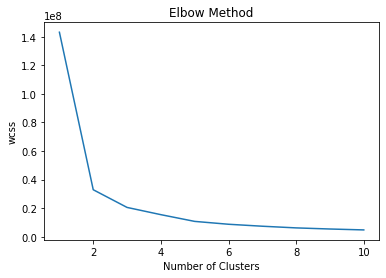

In [9]:
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_data)
kmeans.cluster_centers_

array([[ 811.10727247,   34.75475384],
       [-499.05863515,   -5.74958477],
       [1801.3536003 ,  -52.48773448]])

In [11]:
new_data["cluster"] = kmeans.labels_
new_data.head()

,pca_1,pca_2,cluster
Sales of Wheat in tons,,,
Afghanistan,744.815213,-235.636419,0
Albania,-595.865592,6.105249,1
Algeria,-551.303760,45.952015,1
American Samoa,-700.700584,8.865202,1
Andorra,-645.423819,1.536970,1


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


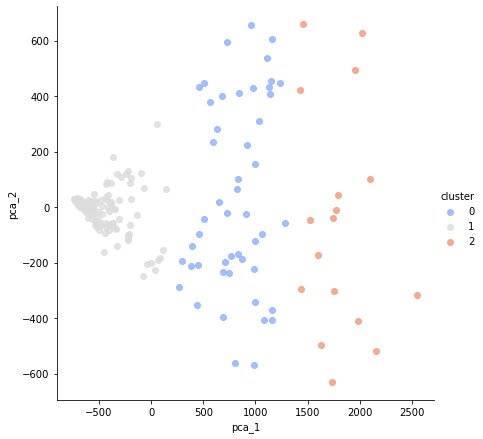

In [12]:
sns.lmplot('pca_1', 'pca_2', data=new_data, hue='cluster',
           palette='coolwarm', height=6, aspect=1, fit_reg=False)

In [13]:
data["cluster"] = kmeans.labels_


In [14]:
new_data.sort_values(["cluster", "pca_1", "pca_2"])
new_data.to_csv("output.csv", index=True)

In [15]:
data.loc["Sierra Leone"]
X = data.loc["Sierra Leone"].index[0:18]
Y = data.loc["Sierra Leone"].values[0:18]

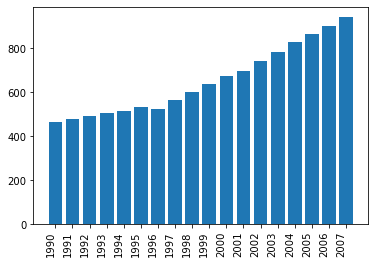

In [16]:
plt.bar(X, Y)
plt.setp(plt.gca().get_xticklabels(), rotation=90,
         horizontalalignment='right')  
plt.show()

In [17]:
data.loc["Monaco"]
X = data.loc["Monaco"].index[0:18]
Y = data.loc["Monaco"].values[0:18]

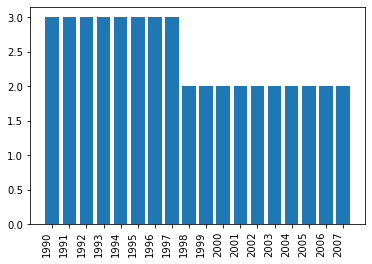

In [18]:
plt.bar(X, Y)
plt.setp(plt.gca().get_xticklabels(), rotation=90,
         horizontalalignment='right')  # Rotate Axis Labels

plt.show()
